In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 6)

## Graph types

NetworkX provides data structures and methods for storing graphs.

All NetworkX graph classes allow (hashable) Python objects as nodes, and any Python object can be assigned as an edge attribute.

The choice of graph class depends on the structure of the graph you want to represent.

- **Graph Type → NetworkX Class**
- Undirected Simple → Graph
- Directed Simple → DiGraph

## Directed graphs

If it is **directed**, there will be an _outcoming_ node and a _incoming_ node. Like money goes from company A to company B. That’s why you can see (kind of) arrows on the left chart, it gives the direction. The flow goes from B to A for example.

The `DiGraph` class provides additional properties specific to directed edges, e.g., `DiGraph.out_edges()`, `DiGraph.in_degree()`, `DiGraph.predecessors()`, `DiGraph.successors()` etc.

In [2]:
# Build a dataframe with connections,
# note that the first two pairs are repeated, in one side or in the other
df = pd.DataFrame({
    'from': ['A', 'B', 'B', 'C', 'F'],
    'to': ['B', 'A', 'C', 'A', 'A']
})

df

,from,to
0,A,B
1,B,A
2,B,C
3,C,A
4,F,A


Text(0.5,1,'Directed graph')

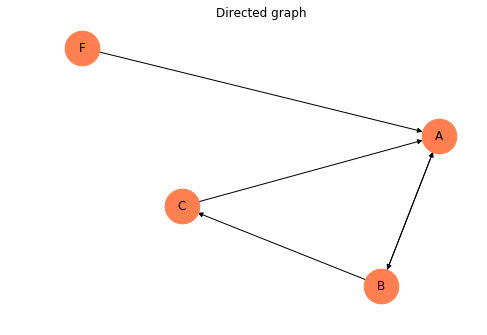

In [3]:
# Build your graph, using DiGraph function
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
 
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        arrows=True
       )

plt.title("Directed graph")

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using `Graph.to_undirected()` or with 

Text(0.5,1,'Undirected graph')

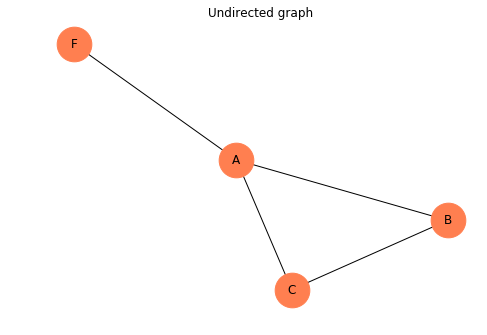

In [4]:
H = nx.Graph(G)  # convert G to undirected graph

nx.draw(H,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        arrows=True
       )

plt.title("Undirected graph")

## Undirected graphs

If it is **undirected**, there is just a link between the 2 nodes, but none of them are marked as _outcoming_ node or a _incoming_ node.

In [5]:
# Build a dataframe with connections,
# note that the first two pairs are repeated, in one side or in the other
df = pd.DataFrame({
    'from': ['A', 'B', 'B', 'C', 'F'],
    'to': ['B', 'A', 'C', 'A', 'A']
})

df

,from,to
0,A,B
1,B,A
2,B,C
3,C,A
4,F,A


Text(0.5,1,'Undirected graph')

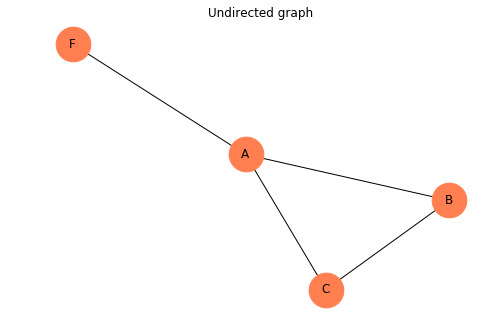

In [6]:
# Build your graph, using Graph function
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
 
nx.draw(G,
        with_labels=True,
        node_size=1200,
        node_color="coral",
        arrows=True
       )

plt.title("Undirected graph")

## Map a color to network nodes

A common task is to **color each node** of your network chart following a feature of your node (we call it **mapping** a color). It allows to display more information in your chart. There are 2 possibilities:

- The feature you want to map is a **numerical** value. Then we will use a **continuous** color scale. On the left graph, A is darker than C that is darker than B.
- The feature is **categorical**. On the right graph, A and B belongs to the same group, D and E are grouped together and C is alone in his group. We used a categorical color scale.

Usually we work with 2 tables. The first one provides the **links** between nodes. The second one **provides** the features of each node. You can link these 2 files as follows.

### Continuous node color scale

Let's create a graph and see its nodes order.

We see that the order of the nodes is the same as they are defined on the DataFrame. Now we are going to add weights to them and try to rearrange the order of them.

Finally, we'll show the graph with different **continuous colors, the darker the higher weight**.

In [7]:
# Build a dataframe with your connections
df = pd.DataFrame({
    'from': ['A', 'B', 'C', 'F', 'D'],
    'to': ['B', 'C', 'A', 'A', 'B']
})

# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
 
# The order of the nodes
list(G.nodes())

['A', 'B', 'C', 'F', 'D']

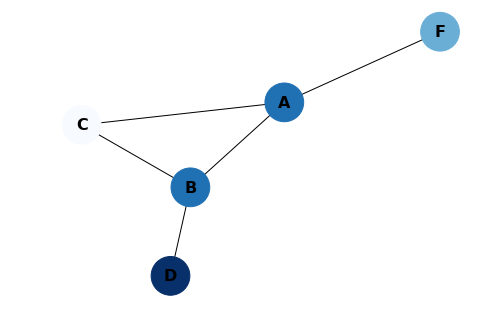

In [8]:
# Another DataFrame with weights for the nodes
weights = pd.DataFrame({
    'node':['A', 'B', 'C', 'D', 'E', 'F'],
    'weight':['5', '5', '2', '6', '1', '4']
})
 
# Make a one level DataFrame and remove unused weights
weights = weights.set_index('node')
weights = weights.reindex(G.nodes())
 
# Plot it, providing a continuous color palette
nx.draw(G,
        with_labels=True,
        node_color=weights['weight'],
        cmap=plt.cm.Blues,
        node_size=1500,
        font_size=16,
        font_weight="bold"
       )

### Categorical node color scale

Let's create a graph and see its nodes order.

We see that the order of the nodes is the same as they are defined on the DataFrame. Now we are going to add weights to them and try to rearrange the order of them.

Finally, we'll show the graph with different **discrete colors, each color means a different weight**.

In [9]:
# Build a dataframe with your connections
df = pd.DataFrame({
    'from': ['A', 'B', 'C', 'F', 'D'],
    'to': ['B', 'C', 'A', 'A', 'B']
})

# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
 
# The order of the nodes
list(G.nodes())

['A', 'B', 'C', 'F', 'D']

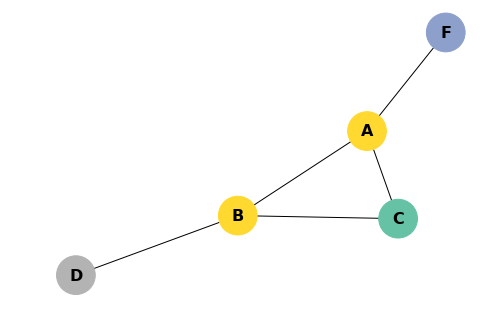

In [10]:
# Another DataFrame with weights for the nodes
weights = pd.DataFrame({
    'node':['A', 'B', 'C', 'D', 'E', 'F'],
    'weight':['w5', 'w5', 'w2', 'w6', 'w1', 'w4']
})
 
# Make a one level DataFrame and remove unused weights
weights = weights.set_index('node')
weights = weights.reindex(G.nodes())

# Transform weights to numerical values: w1->1, w2->2...
weights['weight'] = pd.Categorical(weights['weight'])
weights['weight'].cat.codes


# Plot it, providing a discrete color palette
nx.draw(G,
        with_labels=True,
        node_color=weights['weight'].cat.codes,
        cmap=plt.cm.Set2,
        node_size=1500,
        font_size=16,
        font_weight="bold"
       )

## Map colour to the edges of a Network

Also, edges can be modified depending on different weight values, both continuous or categorical as we saw before with the nodes.

### Continuous edge color scale

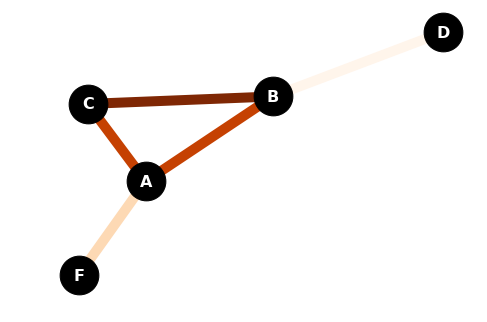

In [11]:
# Build a dataframe with your connections
df = pd.DataFrame({
    'from': ['A', 'B', 'C', 'F', 'D'],
    'to': ['B', 'C', 'A', 'A', 'B'],
    'value': [5, 5, 2, 6, 1]
})

# Build your graph
G = nx.from_pandas_edgelist(df,
                            source='from',
                            target='to',
                            edge_attr=['value'],
                            create_using=nx.Graph()
                           )
 
# Custom the nodes:
nx.draw(G,
        with_labels=True,
        node_color='black',
        node_size=1500,
        edge_color=df['value'],
        width=10,
        font_size=16,
        font_color="white",
        font_weight="bold",
        edge_cmap=plt.cm.Oranges
       )

### Continuous edge color scale

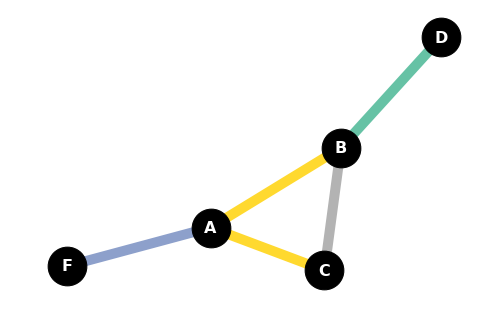

In [12]:
# Build a dataframe with your connections
df = pd.DataFrame({
    'from': ['A', 'B', 'C', 'F', 'D'],
    'to': ['B', 'C', 'A', 'A', 'B'],
    'value': ['v5', 'v5', 'v2', 'v6', 'v1']
})
 
# Transform values to numerical values: w1->1, w2->2...
df['value'] = pd.Categorical(df['value'])
df['value'].cat.codes
 
# Build your graph
G = nx.from_pandas_edgelist(df,
                            source='from',
                            target='to',
                            edge_attr=['value'],
                            create_using=nx.Graph()
                           )

# Custom the nodes:
nx.draw(G,
        with_labels=True,
        node_color='black',
        node_size=1500,
        edge_color=df['value'].cat.codes,
        font_size=16,
        font_color="white",
        font_weight="bold",
        width=10,
        edge_cmap=plt.cm.Set2
       )